##CNN notes

The layers within CNNs contain neurons which are organised in threee dimensions, the spatial dimensionality of the input (height and width) and the depth. The depth deos not refer to the total number of layers within the neural network, but the third dimension of an activation volume. Unlike standard neural networks, the neurons within any given layer will only connect to a small region of the alyer preceding it (Keiron O'Shea et al, 2015)

### Pooling layers

Pooling layers improve the efficiency of the model, by reducing both the dimensionality of the representation and the number of parameters. 

Pooling layers operate on each feature map independently and apply a pooling funciton, such as max pooling or average pooling, within a specified pooling window or kernel size.

Pooling layers discard some spatial information, however the preceding convoluational layer will have captured and encoded the relevant features. Pooling can be thought of as a form of compression - it reduces the dimenationality of the data and reduces the influence of fine-grained details that may not be significant to the overall task at hand.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# load the mnist dataset
from tensorflow.keras.datasets import mnist
(X_TRAIN, Y_TRAIN), (x_test, y_test) = mnist.load_data()

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model 
model = tf.keras.Sequential()
# Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Pooling layer (note Max pooling function is used)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Flatten 3D tensors into 1D vector
model.add(layers.Flatten())
# Fully connected
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 1, 64)         

In [35]:
# Compile the model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
# Preprocess the data
X_TRAIN = X_TRAIN.reshape((X_TRAIN.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [39]:
# Train the model

model.fit(X_TRAIN, Y_TRAIN, epochs=10, batch_size=65, verbose=1)

Epoch 1/10
  1/924 [..............................] - ETA: 3:45 - loss: 25.1074 - accuracy: 0.1077

/opt/homebrew/lib/python3.11/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


924/924 [==============================] - 10s 10ms/step - loss: 0.4003 - accuracy: 0.9093
Epoch 2/10
924/924 [==============================] - 10s 11ms/step - loss: 0.0913 - accuracy: 0.9717
Epoch 3/10
924/924 [==============================] - 10s 11ms/step - loss: 0.0665 - accuracy: 0.9786
Epoch 4/10
924/924 [==============================] - 11s 12ms/step - loss: 0.0530 - accuracy: 0.9839
Epoch 5/10
924/924 [==============================] - 11s 12ms/step - loss: 0.0471 - accuracy: 0.9845
Epoch 6/10
924/924 [==============================] - 10s 11ms/step - loss: 0.0435 - accuracy: 0.9863
Epoch 7/10
924/924 [==============================] - 10s 11ms/step - loss: 0.0339 - accuracy: 0.9894
Epoch 8/10
924/924 [==============================] - 11s 12ms/step - loss: 0.0325 - accuracy: 0.9891
Epoch 9/10
924/924 [==============================] - 10s 11ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 10/10
924/924 [==============================] - 10s 10ms/step - loss: 0.0262 - accurac

In [40]:
# Evaluate the model 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc}')

/opt/homebrew/lib/python3.11/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 0.0640 - accuracy: 0.9833 - 707ms/epoch - 2ms/step
Test Accuracy: 0.983299970626831


313/313 [==============================] - 1s 2ms/step


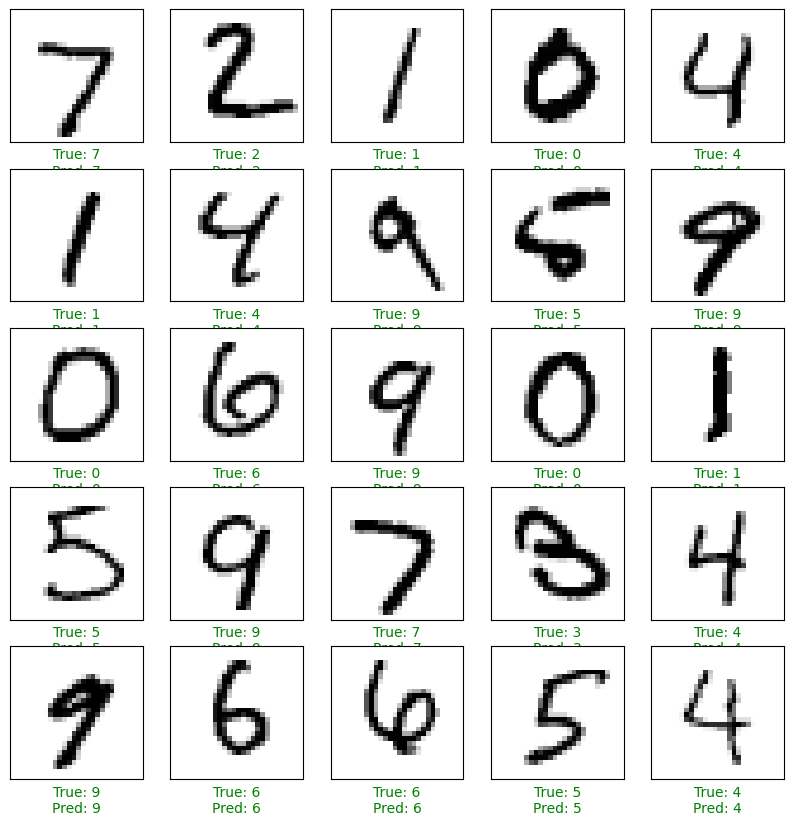

In [41]:
# Model is done now - this is just a pretty output

# Get predictions for test images
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# Display a sample of test images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    true_label = class_labels[y_test[i]]
    predicted_label = class_labels[predicted_labels[i]]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred: {predicted_label}", color=color)

plt.show()

In [43]:
# save the model
model.save('ccn-mnist.h5')